<a href="https://colab.research.google.com/github/artem-dorofeev/py_DataScience_HW/blob/main/HW05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В домашньому завданні до даного модулю ви потренуєтесь робити тестове завдання для влаштування на роботу. За даними акселерометра з мобільного телефону потрібно класифікувати, якою діяльністю займається людина: йде, стоїть, біжить чи йде по сходах. Знайти датасет ви можете за посиланням.

Використайте алгоритми SVM та випадковий ліс з бібліотеки scikit-learn. Як характеристики можете брати показники з акселерометра, проте щоб покращити результати роботи алгоритмів, спочатку можна підготувати наш датасет і розрахувати часові ознаки (time domain features). Більше ці характеристики описані в даній статті.

Порівняйте результати роботи обох алгоритмів на різних фічах та різні моделі між собою.

Порівняйте результати роботи обох алгоритмів на різних фічах та різні моделі між собою. Використайте метод classification report для порівняння.

Порівняння моделей на основі однієї метрики(такої як Accuracy)- не приймається. Дз повинно бути виконано у Jupyter Nootebook,(або Google Colab) і задеплоїне на Гітхаб у вигляді файлу .ipynb.

In [31]:
import pandas as pd
import os

*почнемо з додавання файлів в датасе, розпакуємо архів і дивимося вміст*

In [ ]:
import zipfile
import os

zip_file_path = '/content/HW05/homework.zip'
extracted_dir = '/content/HW05/dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

extracted_files = os.listdir(extracted_dir)
print(extracted_files)


['data']


In [32]:
# перевіряю які дані знаходяться у файлі
file_path = '/content/HW05/dataset/data/idle/idle-1.csv'
df_test = pd.read_csv(file_path)
df_test.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,1.000776,4.616021,8.576031
1,0.718261,4.209007,8.446744
2,-0.909797,-0.282516,9.203311
3,5.099650,0.148441,8.418014
4,1.762132,-0.162806,9.251195


*створюю 4 окреми датасети*

In [33]:
folder_path = "/content/HW05/dataset/data/idle"

idle_data = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)

        data = pd.read_csv(file_path)
        idle_data = pd.concat([idle_data, data], ignore_index=True)

idle_data

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,-0.186748,5.578490,8.370130
1,-0.397437,5.501876,8.159439
2,-0.435745,5.353435,8.532935
3,-0.483629,5.295975,8.274361
4,4.797981,5.755661,6.076484
...,...,...,...
31165,0.387861,-0.004788,9.763555
31166,0.373495,0.004788,9.758766
31167,0.402226,-0.019154,9.763555
31168,0.421380,-0.014365,9.763555


In [34]:
folder_path = "/content/HW05/dataset/data/running"

running_data = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)

        data = pd.read_csv(file_path)
        running_data = pd.concat([running_data, data], ignore_index=True)

running_data

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,-4.285621,-3.016694,-4.941632
1,-1.249773,19.393034,-1.403002
2,4.946421,9.686940,1.474828
3,-9.418790,-5.559336,-3.634398
4,0.186748,11.477803,1.091756
...,...,...,...
102235,24.449587,37.746983,-4.960786
102236,5.228937,-3.131616,-5.492298
102237,24.258050,18.765753,18.794483
102238,-3.323152,12.665327,1.886631


In [35]:
folder_path = "/content/HW05/dataset/data/stairs"

stairs_data = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)

        data = pd.read_csv(file_path)
        stairs_data = pd.concat([stairs_data, data], ignore_index=True)

stairs_data

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,-5.736507,-15.356410,-1.039083
1,1.024718,-3.825934,-3.179500
2,-1.948880,-14.389153,-3.088520
3,-3.203442,-1.072602,-0.071826
4,-6.842628,-6.809109,-1.934515
...,...,...,...
4945,5.880160,-6.900089,-3.509899
4946,4.774039,-9.251195,-2.600103
4947,0.766145,-4.089296,-0.833182
4948,5.865794,-9.840169,-1.230620


In [36]:
folder_path = "/content/HW05/dataset/data/walking"

walking_data = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)

        data = pd.read_csv(file_path)
        walking_data = pd.concat([walking_data, data], ignore_index=True)

walking_data

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,-1.905785,-7.680599,-5.195418
1,-0.478840,-11.492168,-3.586514
2,-4.074931,-1.254562,3.476381
3,-1.623269,-7.364564,-0.330400
4,-1.853112,-7.010222,1.944092
...,...,...,...
55495,-5.080496,-8.508993,0.248997
55496,-8.772355,-13.833697,-0.823605
55497,-4.055777,-8.959103,0.090980
55498,-4.070143,-12.933477,5.310340


*додаю в кожен датасет стовпчик action з цифровим значенням в залежності від активності, та об'єдную в all_data*

In [37]:
idle_data['action'] = 0
running_data['action'] = 1
stairs_data['action'] = 2
walking_data['action'] = 3

all_data = pd.concat([idle_data, running_data, stairs_data, walking_data], ignore_index=True)

all_data

,accelerometer_X,accelerometer_Y,accelerometer_Z,action
0,-0.186748,5.578490,8.370130,0
1,-0.397437,5.501876,8.159439,0
2,-0.435745,5.353435,8.532935,0
3,-0.483629,5.295975,8.274361,0
4,4.797981,5.755661,6.076484,0
...,...,...,...,...
193855,-5.080496,-8.508993,0.248997,3
193856,-8.772355,-13.833697,-0.823605,3
193857,-4.055777,-8.959103,0.090980,3
193858,-4.070143,-12.933477,5.310340,3


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    all_data.drop('action', axis=1),
    all_data['action'],
    test_size=0.2,
    random_state=42
)

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6203
           1       0.93      0.90      0.92     20485
           2       1.00      0.00      0.00      1022
           3       0.80      0.91      0.85     11062

    accuracy                           0.89     38772
   macro avg       0.92      0.70      0.69     38772
weighted avg       0.90      0.89      0.88     38772

Accuracy: 0.8938667079335603

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6203
           1       1.00      1.00      1.00     20485
           2       1.00      1.00      1.00      1022
           3       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772

Accuracy: 0.9998194573403487


*візуалізація*

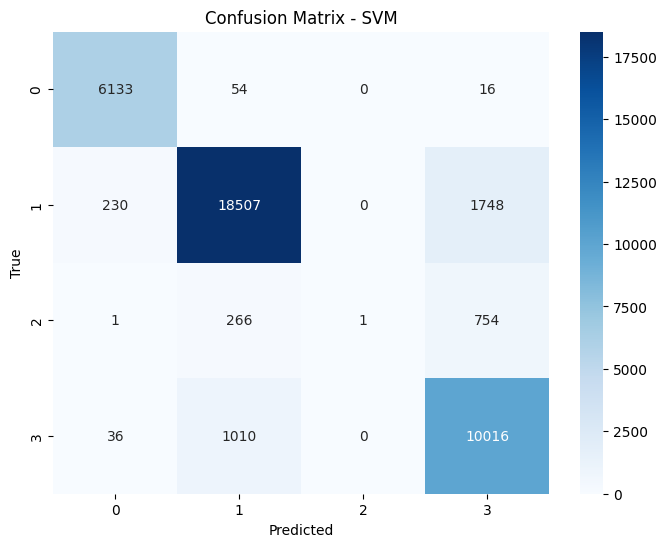

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

svm_cm = confusion_matrix(y_test, svm_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


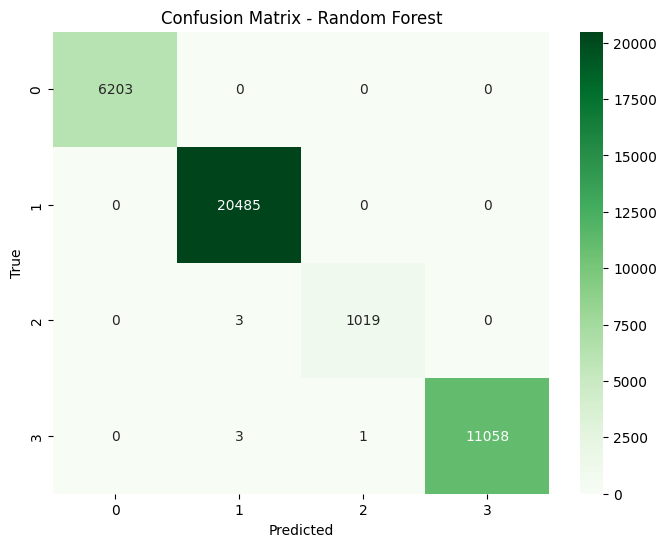

In [40]:
rf_cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


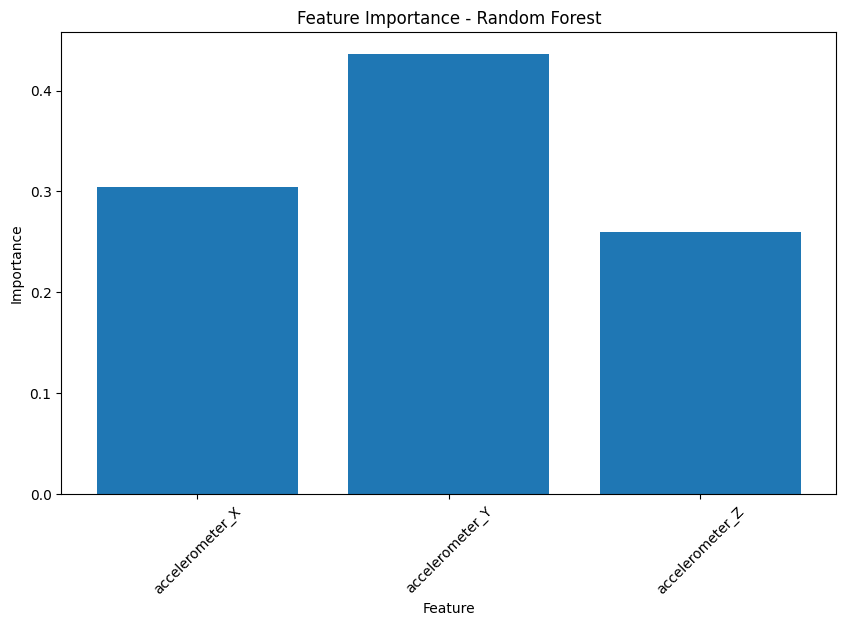

In [41]:
feature_importance_rf = rf_model.feature_importances_


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_rf)), feature_importance_rf, align='center')
plt.xticks(range(len(all_data.columns) - 1), all_data.columns[:-1], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()
